In [59]:
#I followed this tutorial to create the PCA: https://www.youtube.com/watch?v=oiusrJ0btwA
# Repo: https://github.com/dataprofessor/code/blob/master/python/PCA_analysis.ipynb
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
import numpy as np

In [11]:
df = pd.read_csv('data/data_pca_statelevel.csv')

In [13]:
df

,ds,bing_tiles_visited,single_tile_users,driving,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,...,bing_tiles_visited t-10,single_tile_users t-10,driving t-10,retail_and_recreation t-10,grocery_and_pharmacy t-10,parks t-10,transit_stations t-10,workplaces t-10,residential t-10,state
0,2020-03-11,-0.03919,0.18472,94.28,-5.0,1.0,2.0,-10.0,-3.0,2.0,...,0.02448,0.34350,95.18,3.0,13.0,20.0,-2.0,0.0,1.0,Nordrhein-Westfalen
1,2020-03-12,0.00440,0.17162,88.98,-6.0,5.0,11.0,-9.0,-3.0,2.0,...,0.10552,0.16534,96.52,-2.0,6.0,-5.0,-3.0,1.0,0.0,Nordrhein-Westfalen
2,2020-03-13,-0.04677,0.18027,83.24,-11.0,18.0,-4.0,-15.0,-4.0,4.0,...,0.03875,0.16648,103.45,2.0,5.0,24.0,-3.0,-1.0,1.0,Nordrhein-Westfalen
3,2020-03-14,-0.03018,0.23691,75.34,-18.0,9.0,44.0,-19.0,-4.0,4.0,...,-0.00509,0.17327,100.06,2.0,2.0,19.0,-5.0,-1.0,1.0,Nordrhein-Westfalen
4,2020-03-15,-0.04349,0.37500,66.70,-16.0,7.0,90.0,-18.0,-7.0,3.0,...,0.00520,0.17409,101.23,-6.0,-2.0,-15.0,-7.0,-1.0,2.0,Nordrhein-Westfalen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2020-06-22,0.05151,0.18247,128.65,-4.0,-1.0,139.0,-14.0,-22.0,5.0,...,-0.03008,0.18600,140.77,-10.0,-1.0,190.0,-16.0,-23.0,6.0,Niedersachsen
1340,2020-06-23,0.04565,0.18028,134.49,-4.0,0.0,167.0,-13.0,-21.0,5.0,...,-0.00476,0.23851,121.34,-25.0,-7.0,121.0,-13.0,4.0,4.0,Niedersachsen
1341,2020-06-24,0.03336,0.18192,134.50,-5.0,0.0,175.0,-13.0,-20.0,5.0,...,-0.01042,0.38116,147.52,-30.0,20.0,54.0,-17.0,5.0,3.0,Niedersachsen
1342,2020-06-25,0.01524,0.18184,138.13,-9.0,0.0,151.0,-15.0,-21.0,5.0,...,0.01756,0.19461,123.81,-7.0,-3.0,107.0,-17.0,-22.0,6.0,Niedersachsen


In [33]:
input_columns = list(df.columns)

In [35]:
input_columns.pop()

'state'

In [36]:
input_columns.pop(0)

'ds'

In [40]:
df[input_columns]

,bing_tiles_visited,single_tile_users,driving,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,#cases,...,residential t-9,bing_tiles_visited t-10,single_tile_users t-10,driving t-10,retail_and_recreation t-10,grocery_and_pharmacy t-10,parks t-10,transit_stations t-10,workplaces t-10,residential t-10
0,-0.03919,0.18472,94.28,-5.0,1.0,2.0,-10.0,-3.0,2.0,705.0,...,0.0,0.02448,0.34350,95.18,3.0,13.0,20.0,-2.0,0.0,1.0
1,0.00440,0.17162,88.98,-6.0,5.0,11.0,-9.0,-3.0,2.0,731.0,...,1.0,0.10552,0.16534,96.52,-2.0,6.0,-5.0,-3.0,1.0,0.0
2,-0.04677,0.18027,83.24,-11.0,18.0,-4.0,-15.0,-4.0,4.0,863.0,...,1.0,0.03875,0.16648,103.45,2.0,5.0,24.0,-3.0,-1.0,1.0
3,-0.03018,0.23691,75.34,-18.0,9.0,44.0,-19.0,-4.0,4.0,898.0,...,2.0,-0.00509,0.17327,100.06,2.0,2.0,19.0,-5.0,-1.0,1.0
4,-0.04349,0.37500,66.70,-16.0,7.0,90.0,-18.0,-7.0,3.0,888.0,...,2.0,0.00520,0.17409,101.23,-6.0,-2.0,-15.0,-7.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.05151,0.18247,128.65,-4.0,-1.0,139.0,-14.0,-22.0,5.0,21.0,...,4.0,-0.03008,0.18600,140.77,-10.0,-1.0,190.0,-16.0,-23.0,6.0
1340,0.04565,0.18028,134.49,-4.0,0.0,167.0,-13.0,-21.0,5.0,62.0,...,3.0,-0.00476,0.23851,121.34,-25.0,-7.0,121.0,-13.0,4.0,4.0
1341,0.03336,0.18192,134.50,-5.0,0.0,175.0,-13.0,-20.0,5.0,38.0,...,6.0,-0.01042,0.38116,147.52,-30.0,20.0,54.0,-17.0,5.0,3.0
1342,0.01524,0.18184,138.13,-9.0,0.0,151.0,-15.0,-21.0,5.0,29.0,...,6.0,0.01756,0.19461,123.81,-7.0,-3.0,107.0,-17.0,-22.0,6.0


In [42]:
X = df[input_columns]
Y= df[['ds','state']]

In [45]:
X = scale(X)

In [46]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
scores = pca.transform(X)

In [48]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,8.743259,-4.713602,-1.690663
1,8.711323,-4.829501,-1.977344
2,8.334353,-4.900715,-2.151268
3,7.861232,-4.988455,-2.369438
4,7.366650,-5.019631,-2.400794
...,...,...,...
1339,9.335401,2.870129,0.935605
1340,9.418450,2.539577,2.473527
1341,9.657386,2.784688,0.943015
1342,9.835645,2.913141,0.239845


In [49]:
Y_label = list(map(str.__add__, df['ds'], df['state']))

In [50]:
Y_label

['2020-03-11Nordrhein-Westfalen',
 '2020-03-12Nordrhein-Westfalen',
 '2020-03-13Nordrhein-Westfalen',
 '2020-03-14Nordrhein-Westfalen',
 '2020-03-15Nordrhein-Westfalen',
 '2020-03-16Nordrhein-Westfalen',
 '2020-03-17Nordrhein-Westfalen',
 '2020-03-18Nordrhein-Westfalen',
 '2020-03-19Nordrhein-Westfalen',
 '2020-03-20Nordrhein-Westfalen',
 '2020-03-21Nordrhein-Westfalen',
 '2020-03-22Nordrhein-Westfalen',
 '2020-03-23Nordrhein-Westfalen',
 '2020-03-24Nordrhein-Westfalen',
 '2020-03-25Nordrhein-Westfalen',
 '2020-03-26Nordrhein-Westfalen',
 '2020-03-27Nordrhein-Westfalen',
 '2020-03-28Nordrhein-Westfalen',
 '2020-03-29Nordrhein-Westfalen',
 '2020-03-30Nordrhein-Westfalen',
 '2020-03-31Nordrhein-Westfalen',
 '2020-04-01Nordrhein-Westfalen',
 '2020-04-02Nordrhein-Westfalen',
 '2020-04-03Nordrhein-Westfalen',
 '2020-04-04Nordrhein-Westfalen',
 '2020-04-05Nordrhein-Westfalen',
 '2020-04-06Nordrhein-Westfalen',
 '2020-04-07Nordrhein-Westfalen',
 '2020-04-08Nordrhein-Westfalen',
 '2020-04-09No

In [51]:
date_land = pd.DataFrame(Y_label, columns=['date_land'])

In [53]:
df_scores = pd.concat([scores_df, date_land], axis=1)

In [54]:
df_scores

,PC1,PC2,PC3,date_land
0,8.743259,-4.713602,-1.690663,2020-03-11Nordrhein-Westfalen
1,8.711323,-4.829501,-1.977344,2020-03-12Nordrhein-Westfalen
2,8.334353,-4.900715,-2.151268,2020-03-13Nordrhein-Westfalen
3,7.861232,-4.988455,-2.369438,2020-03-14Nordrhein-Westfalen
4,7.366650,-5.019631,-2.400794,2020-03-15Nordrhein-Westfalen
...,...,...,...,...
1339,9.335401,2.870129,0.935605,2020-06-22Niedersachsen
1340,9.418450,2.539577,2.473527,2020-06-23Niedersachsen
1341,9.657386,2.784688,0.943015,2020-06-24Niedersachsen
1342,9.835645,2.913141,0.239845,2020-06-25Niedersachsen


In [55]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=input_columns)
df_loadings

,PC1,PC2,PC3
bing_tiles_visited,0.106502,0.130327,-0.045411
single_tile_users,-0.076132,-0.074288,-0.134437
driving,0.114397,0.191358,0.044128
retail_and_recreation,0.121850,0.084338,0.029961
grocery_and_pharmacy,0.053632,0.047386,-0.082625
...,...,...,...
grocery_and_pharmacy t-10,0.040267,-0.101796,0.028523
parks t-10,0.055098,0.172320,0.091147
transit_stations t-10,0.118017,-0.163286,0.021932
workplaces t-10,0.078751,-0.178677,0.092944


In [56]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4564822 , 0.07826743, 0.03931106])

In [61]:
explained_variance = np.insert(explained_variance, 0, 0)

In [62]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [63]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [64]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.456482,0.456
2,PC2,0.078267,0.534
3,PC3,0.039311,0.573


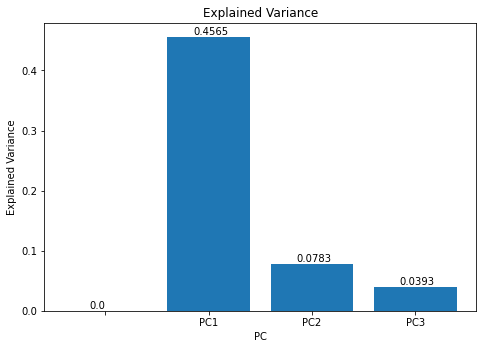

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ['','PC1', 'PC2', 'PC3']
y_axis = explained_variance
ax.bar(x_axis,y_axis)
plt.title('Explained Variance')
plt.xlabel('PC')
plt.ylabel('Explained Variance')

for i, v in enumerate(y_axis):
    plt.text(i - 0.15, v + 0.004, str(np.round(v, decimals=4)))
    
plt.show()

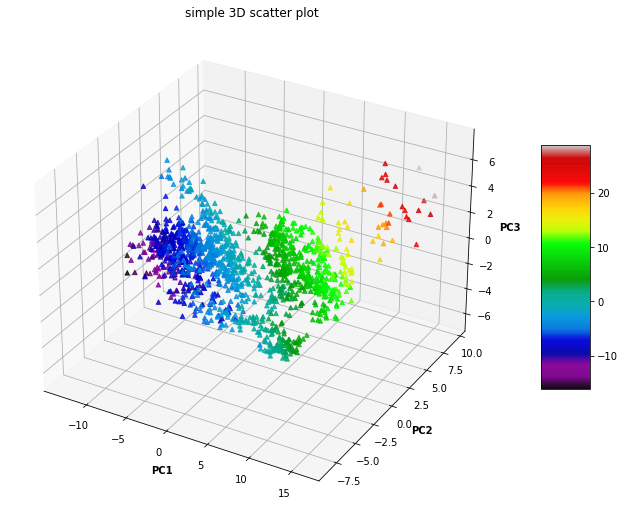

In [113]:
# Creating figure 
fig = plt.figure(figsize = (16, 9)) 
ax = plt.axes(projection ="3d") 
    
# Add x, y gridlines  
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.3,  
        alpha = 0.2)  
  
  
# Creating color map - https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
my_cmap = plt.get_cmap('nipy_spectral') 
  
# Creating plot 
sctt = ax.scatter3D(df_scores.PC1, df_scores.PC2, df_scores.PC3, 
                    alpha = 0.8, 
                    c = (df_scores.PC1 + df_scores.PC2 + df_scores.PC3),  
                    cmap = my_cmap,  
                    marker ='^') 
  
plt.title("simple 3D scatter plot") 
ax.set_xlabel('PC1', fontweight ='bold')  
ax.set_ylabel('PC2', fontweight ='bold')  
ax.set_zlabel('PC3', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 
  
# show plot 
plt.show() 